# data
note that in the work, preparing data will 90% of time

its really important to prepare a clean dataset

In this section, we are going to use mnist

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

# common sense for overfitting
we focus on the model performance on new data, that's is test dataset

if we train a model for a long enough time, we will get an overfitting model

In [2]:
# get train dataset and test dataset
train = datasets.MNIST(
    root="", 
    train=True, 
    download=True, 
    transform=transforms.Compose([transforms.ToTensor()])
    )

test = datasets.MNIST(
    root="", 
    train=False, 
    download=True, 
    transform=transforms.Compose([transforms.ToTensor()])
    )

# note that here we use build-in transform

In [3]:
type(train), type(test)

(torchvision.datasets.mnist.MNIST, torchvision.datasets.mnist.MNIST)

In [4]:
import torch.utils
import torch.utils.data


trainset = torch.utils.data.DataLoader(
    train, 
    batch_size=16, 
    shuffle=True
    )
testset = torch.utils.data.DataLoader(
    test, 
    batch_size=16, 
    shuffle=True
    )

# batchsize is always base 8, note that this is no reason
# batchsize is not as big as possible
# usually between 8 to 64

# MNIST
a hand-drawn dataset of numbers from 0 to 9
- 28 * 28 image 
- if `shuffle=False`, the network will be like out put 0, then 1, then 2, ..., finally 9, all images will be classified 9
- if `shuffle=True`, the network will learn the general principles

In [5]:
for data in trainset:
    print(data)
    print(type(data))
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
# we can see that, the data is a list including [tensor_X, tensor_label], where the size is 16

In [7]:
# based on above analysis, we try to extract image 5 and label 5
x, y = data[0][0], data[1][0]
# here data[0] is 3dim tensor, data[0][0] is 3dim(actually 2dim) matrix
x, y

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
x.shape

torch.Size([1, 28, 28])

# shape of tensor
its quite important, although here is 3dim, but its actually 2dim, this would lead to some problems

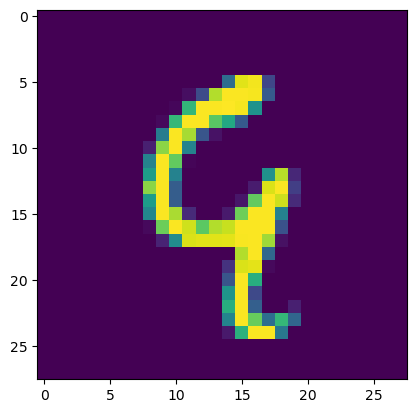

In [9]:
from matplotlib import pyplot as plt

plt.imshow(x.view([28, 28])) # .view(28, 28)
plt.show()

the model doesnt know how good we can get, so it will try its best to decrease the loss
- imagine the situation that the number distribution is not uniform
- - then the model will try to output the number having max frequency, its called local optimization
Hence, we really need our dataset to be balanced 

In [10]:
# check the dataset if its balanced
total = 0
counter_dict = {
    0:0,
    1:0,
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0
}
# the key is int, the value of the key is also int

for data in trainset:
    Xs, ys = data
    for y in ys: # this loop is counting numbers
        counter_dict[int(y)] += 1 # change tensor to int
        total += 1

counter_dict

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [11]:
for number in counter_dict:
    print(f'{number}: {round(counter_dict[number] / total * 100, 2)}%')

# the dataset is balanced enough
# its not perfectly 10%, but its acceptable

0: 9.87%
1: 11.24%
2: 9.93%
3: 10.22%
4: 9.74%
5: 9.04%
6: 9.86%
7: 10.44%
8: 9.75%
9: 9.92%


# In the End
emphersize again the data is much more important than nn